# Analises em cima dos tweets coletados

In [168]:
import pandas as pd
import matplotlib

import json
import numpy as np
import textblob

from bs4 import BeautifulSoup
pd.set_option('max_columns', 35)

plt.style.use('seaborn')

In [2]:
#carregando os tweets com pandas direto do formato json
df_tweets = pd.read_json('tweet_info_01.json', lines=True)

#mostando as dimensões da tabela
df_tweets.shape

(2336, 30)

In [3]:
#mostrandos os primeiros exemplos
#não se assustem com algumas colunas "bugadas" da pra acessar os dados dela do mesmo jeito
df_tweets.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,2020-08-01 01:19:49+00:00,1289370218100338688,1289370218100338688,Home office é vc receber msg no grupo do traba...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 159301902, 'id_str': '159301902', 'name...",None,None,None,NaN,False,0,0,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-01 01:19:44+00:00,1289370196373774337,1289370196373774336,RT @kuangrf: right–i've figured out how to sen...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 791665145344688129, 'id_str': '79166514...",None,None,None,NaN,False,888,0,False,False,en,{'created_at': 'Fri Jul 31 18:47:15 +0000 2020...,0.0,NaN,NaN,NaN,NaN
2,2020-08-01 01:19:43+00:00,1289370191252434945,1289370191252434944,RT @LauraJaneGrace: Have spent all of July alo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 974875354916622337, 'id_str': '97487535...",None,None,None,NaN,False,7,0,False,False,en,{'created_at': 'Fri Jul 31 22:48:35 +0000 2020...,NaN,NaN,NaN,NaN,NaN
3,2020-08-01 01:19:37+00:00,1289370164908056577,1289370164908056576,aumentaram meu home office por tempo indetermi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 1979201605, 'id_str': '1979201605', 'na...",None,None,None,NaN,False,0,0,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-01 01:19:34+00:00,1289370154892058624,1289370154892058624,RT @MommyLTLORiley: Cherry 3 Shelf Bookcase Wo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,NaN,NaN,NaN,None,"{'id': 53155646, 'id_str': '53155646', 'name':...",None,None,None,NaN,False,2,0,False,False,en,{'created_at': 'Sun Jul 12 01:18:34 +0000 2020...,0.0,NaN,NaN,NaN,NaN


In [4]:
#pegando apenas conteudo na linguagem pt
df_ptlang_tweets = df_tweets[df_tweets['lang'] == 'pt']
df_ptlang_tweets.reset_index(drop=True, inplace=True)
df_ptlang_tweets

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,2020-08-01 01:19:49+00:00,1289370218100338688,1289370218100338688,Home office é vc receber msg no grupo do traba...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 159301902, 'id_str': '159301902', 'name...",None,None,None,NaN,False,0,0,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-01 01:19:37+00:00,1289370164908056577,1289370164908056576,aumentaram meu home office por tempo indetermi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 1979201605, 'id_str': '1979201605', 'na...",None,None,None,NaN,False,0,0,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-01 01:18:44+00:00,1289369942463115266,1289369942463115264,tem tretas no tuiter que só existem pelo nível...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 32523584, 'id_str': '32523584', 'name':...",None,None,None,NaN,False,0,0,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-01 01:18:17+00:00,1289369831569932288,1289369831569932288,@Cee_Dutra 😣nossa isso é horrível.\nMeus últim...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.289368e+18,1.289368e+18,64046268.0,64046268.0,Cee_Dutra,"{'id': 83395247, 'id_str': '83395247', 'name':...",None,None,"{'id': '68e019afec7d0ba5', 'url': 'https://api...",NaN,False,0,0,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-01 01:18:05+00:00,1289369778973478913,1289369778973478912,RT @camila_cmello: e eu que dormi no meio do h...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 238561876, 'id_str': '238561876', 'name...",None,None,None,NaN,False,1,0,False,False,pt,{'created_at': 'Fri Jul 31 12:11:28 +0000 2020...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2020-07-23 14:39:25+00:00,1286309952672477185,1286309952672477184,Trabalho Remoto: Dicas da equipe Bitrix24!\n#h...,True,"{'hashtags': [{'text': 'homeoffice', 'indices'...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 973496513677668352, 'id_str': '97349651...",None,None,None,NaN,False,0,0,False,False,pt,NaN,0.0,NaN,NaN,NaN,NaN
995,2020-07-23 14:31:29+00:00,1286307955881771008,1286307955881771008,Facilidade no trabalho remoto: Novos recursos ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""http://rdstation.com.br"" rel=""nofollo...",NaN,NaN,NaN,NaN,None,"{'id': 1173570501354151937, 'id_str': '1173570...",None,None,None,NaN,False,0,0,False,False,pt,NaN,0.0,NaN,NaN,NaN,NaN
996,2020-07-23 11:17:04+00:00,1286259027513675782,1286259027513675776,Participe e ganhe acesso a sessão devolutiva c...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'pt', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 34287893, 'id_str': '34287893', 'name':...",None,None,None,NaN,False,0,0,F

In [5]:
df_ptlang_tweets.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'retweeted_status', 'possibly_sensitive', 'extended_entities',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [6]:
df_most_favorite = df_ptlang_tweets.sort_values('favorite_count', ascending=False)
df_most_favorite[['text', 'favorite_count']].head(10)

,text,favorite_count
374,Suecos são convocados a permanecer em home off...,584
686,"@andre_rochadel não é home office, é trabalho ...",349
191,A diminuição do trabalho remoto em atividades ...,226
148,#AJustiçaNãoPara ⚖️ Durante o período da pande...,110
558,Lembrando que o CNPq suspendeu o trabalho remo...,108
618,Reitoria da Uerj prorrogou suspensão de ativid...,102
837,Servidor com filho na escola poderá manter tra...,85
300,💻🖥️| Novas regras para o trabalho remoto são a...,60
790,O trabalho remoto beneficia o mercado imobiliá...,56
483,@hilde_angel Fica na Praça dos Três Poderes no...,51


In [7]:
#Não sei rick, me parece que coisa errada ai
#merece uma melhor
df_most_retweet = df_ptlang_tweets.sort_values('retweet_count', ascending=False)
df_most_retweet[['text', 'retweet_count']].head(10)

,text,retweet_count
64,RT @giordanelages: Será que ninguém tem um emp...,407
24,RT @giordanelages: Será que ninguém tem um emp...,406
31,RT @giordanelages: Será que ninguém tem um emp...,406
16,RT @giordanelages: Será que ninguém tem um emp...,406
269,RT @HugoRoger: Empresas oferecendo ótimas opor...,358
819,RT @PriWi: Procura-se Ilustradora assistente (...,253
14,RT @MelhemSaad: Lembrem que o STF já decidiu q...,39
41,RT @MelhemSaad: Lembrem que o STF já decidiu q...,39
104,RT @MelhemSaad: Lembrem que o STF já decidiu q...,39
30,RT @MelhemSaad: Lembrem que o STF já decidiu q...,39


In [8]:
df_most_all = df_ptlang_tweets.sort_values(['favorite_count', 'retweet_count'], ascending=False)
df_most_all[['text', 'favorite_count', 'retweet_count']].head(10)

,text,favorite_count,retweet_count
374,Suecos são convocados a permanecer em home off...,584,27
686,"@andre_rochadel não é home office, é trabalho ...",349,4
191,A diminuição do trabalho remoto em atividades ...,226,20
148,#AJustiçaNãoPara ⚖️ Durante o período da pande...,110,15
558,Lembrando que o CNPq suspendeu o trabalho remo...,108,33
618,Reitoria da Uerj prorrogou suspensão de ativid...,102,13
837,Servidor com filho na escola poderá manter tra...,85,5
300,💻🖥️| Novas regras para o trabalho remoto são a...,60,23
790,O trabalho remoto beneficia o mercado imobiliá...,56,5
483,@hilde_angel Fica na Praça dos Três Poderes no...,51,3


In [9]:
df_ptlang_tweets['user'][0]

{'id': 159301902,
 'id_str': '159301902',
 'name': '🐢TarTorugo ☭🇧🇷🚩',
 'screen_name': 'TarTorugo',
 'location': 'Viciosa',
 'description': 'Cientista Social casas Bahia e favela, sou!                   \nRede das lamentações.\n🔺✊🏿🏳️\u200d🌈👨🏿\u200d🤝\u200d👨🏾📚⬅️✌🏿🦁🦊💭',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 385,
 'friends_count': 539,
 'listed_count': 39,
 'created_at': 'Fri Jun 25 00:57:07 +0000 2010',
 'favourites_count': 17239,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 9832,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': True,
 'profile_image_url': 'http://pbs.twimg.com/

In [10]:
df_ptlang_tweets['source']

0      <a href="http://twitter.com/download/android" ...
1      <a href="http://twitter.com/download/iphone" r...
2      <a href="http://twitter.com/download/iphone" r...
3      <a href="http://twitter.com/download/android" ...
4      <a href="http://twitter.com/download/iphone" r...
                             ...                        
994    <a href="https://mobile.twitter.com" rel="nofo...
995    <a href="http://rdstation.com.br" rel="nofollo...
996    <a href="https://mobile.twitter.com" rel="nofo...
997    <a href="https://getbambu.com" rel="nofollow">...
998    <a href="https://www.hootsuite.com" rel="nofol...
Name: source, Length: 999, dtype: object

In [11]:
bs = BeautifulSoup(df_ptlang_tweets['source'][0])

In [12]:
import nltk
#nltk.download('stopwords')

In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [14]:
from nltk.tokenize import word_tokenize 

In [15]:
text = df_ptlang_tweets['text'].copy()

In [16]:
lista_frases = []
for frase in text:
    lista_frases.append(word_tokenize(frase))

In [17]:
filtered_sentence = [w for w in lista_frases if not w in stopwords] 

In [18]:
!pip install wordcloud

In [19]:
frases = str(df_ptlang_tweets['text'].values)

In [20]:
import matplotlib.pyplot as plt

In [22]:
from wordcloud import WordCloud

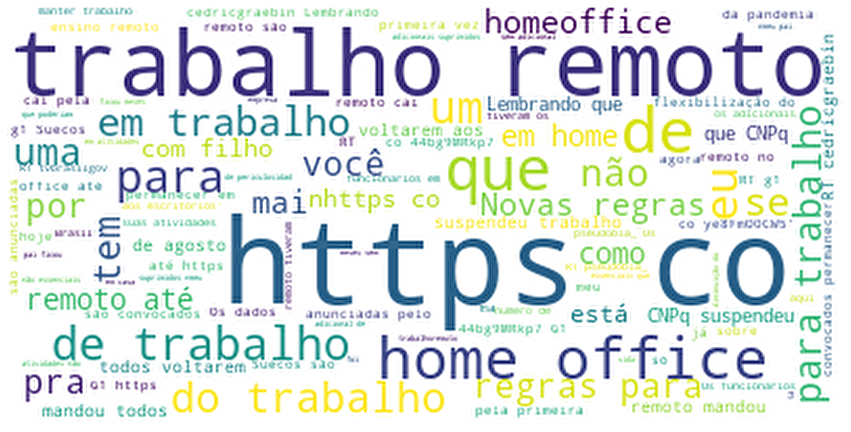

In [23]:
# Gerando um wordcloud sem remover as stopwords
wc = WordCloud(background_color="white").generate(frases)

plt.figure(figsize=(15, 11))
# Create a figure of the generated cloud
plt.imshow(wc, interpolation='sinc')  
plt.axis('off')
# Display the figure
plt.show()

In [35]:
textos = pd.DataFrame(index=df_ptlang_tweets.index)

### inserindo novas Stopwords

In [93]:
stop = ['vc', ',', ':', '...', 'em…', 'q', 'pq', '@', '.', '..to', 'hmmm', 'lá'
        'fi…', 'haha', '!', '?', 'como', 'a…', 'h…', 'pra', '|', '+', 'tô', '“', '”', '#', '-', 'rt']

for i in stop:
    stopwords.append(i)

In [94]:
def clean_text(text):
    #removendo os emojis
    text = text.lower()
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    frase = regrex_pattern.sub(r'',text)
    regrex_pattern_two = re.compile(pattern = 'https://t.co/[\d*\D*]+')
    frase = regrex_pattern_two.sub(r'', frase)
    
    
    word_tokens = word_tokenize(frase) 
    filtered_sentence = [w for w in word_tokens if not w in stopwords] 
    return filtered_sentence

In [95]:
textos['text'] = df_ptlang_tweets['text'].apply(clean_text)

In [101]:
def remove_list (text):
    text = str(text)
    text = text.replace('[', '').replace(']', '')
    text = text.replace(',', '').replace("'","")
    return text

In [103]:
textos['text_clear'] = textos['text'].apply(remove_list)

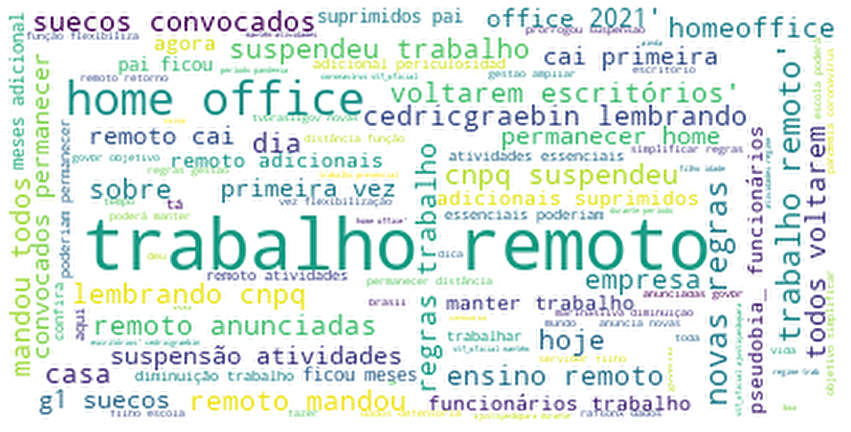

In [109]:
# Gerando um wordcloud sem remover as stopwords
wc = WordCloud(background_color="white").generate(str(textos['text_clear'].values))

plt.figure(figsize=(15, 11))
# Create a figure of the generated cloud
plt.imshow(wc, interpolation='sinc')  
plt.axis('off')
# Display the figure
plt.show()

## Avaliar o volume de tweets publicados por data.

In [119]:
df_ptlang_tweets.groupby('created_at').count()

,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-23 09:29:38+00:00,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0
2020-07-23 11:00:01+00:00,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0
2020-07-23 11:17:04+00:00,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0
2020-07-23 14:31:29+00:00,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0
2020-07-23 14:39:25+00:00,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01 01:18:44+00:00,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2020-08-01 01:19:37+00:00,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2020-08-01 01:19:49+00:00,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0


In [146]:
tweets_ = pd.DatetimeIndex(df_ptlang_tweets['created_at'])
tweets = pd.DataFrame()
tweets['month'] = tweets_.month
tweets['day'] = tweets_.day
tweets['number_tweets'] = df_ptlang_tweets['text']
tweets = tweets.groupby(['month', 'day']).count()
tweets

number_tweets
month day               
7     23              10
      24              13
      25               3
      26               3
      27              11
      28              56
      29             183
      30             239
      31             372
8     1              109

### Criar um mapa de calor dos tweets utilizando a localização declarada pelos usuários

In [182]:
df_ptlang_tweets.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'retweeted_status', 'possibly_sensitive', 'extended_entities',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [227]:
coordenadas = df_tweets[df_tweets['coordinates'].notnull()]['coordinates']

In [228]:
coordenadas

531     {'type': 'Point', 'coordinates': [-118.19259, ...
1150    {'type': 'Point', 'coordinates': [-47.92043585...
1263    {'type': 'Point', 'coordinates': [-49.34702244...
1392    {'type': 'Point', 'coordinates': [-46.19313794...
1400    {'type': 'Point', 'coordinates': [-46.325, -23...
1501    {'type': 'Point', 'coordinates': [-100.7902945...
1523    {'type': 'Point', 'coordinates': [-89.67950424...
1542    {'type': 'Point', 'coordinates': [-45.88694444...
1560    {'type': 'Point', 'coordinates': [-86.7837, 36...
1645    {'type': 'Point', 'coordinates': [-99.8825, 16...
1687    {'type': 'Point', 'coordinates': [-44.45431929...
1777    {'type': 'Point', 'coordinates': [-82.12277778...
1779    {'type': 'Point', 'coordinates': [13.377703499...
1931    {'type': 'Point', 'coordinates': [-88.20116, 2...
1952    {'type': 'Point', 'coordinates': [-70.63805161...
1989    {'type': 'Point', 'coordinates': [19.0503, 47....
2074    {'type': 'Point', 'coordinates': [-99.11127617...
2168    {'type

In [232]:
lista_coord = []
for i in coordenadas:
    lista_coord.append(i['coordinates'])
    

In [233]:
import os
import folium

In [239]:
from folium.plugins import HeatMap

m = folium.Map([48., 5.], tiles='stamentoner', zoom_start=3)

HeatMap(lista_coord).add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m
#ta bugado as localizações, mas ta funcionando